In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

 Round 3
 -  apply K-fold cross validation on your models before and check the model score.
**Note**: So far we have not balanced the data.

# Handling Data imbalance Classification Model 

In [2]:
churnData= pd.read_csv("/Users/irenewalken/Documents/GitHub/IH_RH_DA_FT_AUG_2022/Class_Materials/Machine_Learning/Supervised_Learning/Lab/Data/DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


**Check the data types**

In [3]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Change TotalCharges to numerical values**

In [4]:
churnData["TotalCharges"]= churnData["TotalCharges"].map(lambda x: x.replace(" ",""))

In [5]:
churnData["TotalCharges"] = churnData["TotalCharges"].apply(pd.to_numeric)

**Check if we have NaN values**

In [6]:
churnData.isnull().sum().sum()

11

In [7]:
churnData_nan = churnData[churnData.isna().any(axis=1)]
churnData_nan

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,Yes,Yes,No,Two year,56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Two year,73.35,NaN,No


**Change NaN to median** (because we have too big deviatoin between min and max) 

In [8]:
churnData["TotalCharges"] = churnData["TotalCharges"].fillna(churnData["TotalCharges"].median())

In [9]:
churnData_numerical = churnData.select_dtypes(include=np.number, exclude=np.object)#get numerical data
churnData_numerical

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [10]:
target = churnData["Churn"] = churnData["Churn"].replace(["No","Yes"], [0,1])
target

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [11]:
target.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [12]:
5174/len(target)

0.7346301292063041

In [13]:
data = pd.concat([churnData_numerical, target], axis = 1)
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [14]:
data.shape

(7043, 5)

## Downsampling

<b>In downsampling, we randomly sample without replacement from the majority class

In [15]:
churn_0 = data[data["Churn"] == 0]
churn_1 = data[data["Churn"] == 1]

In [16]:
print(churn_0.shape)
print(churn_1.shape)

(5174, 5)
(1869, 5)


In [17]:
churn_0_down = churn_0.sample(len(churn_1))
print(churn_0_down.shape)
print(churn_1.shape)

(1869, 5)
(1869, 5)


In [18]:
data = pd.concat([churn_0_down,churn_1 ], axis = 0)
#shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [19]:
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
3379,0,2,19.30,44.40,0
2668,0,1,19.75,19.75,1
339,0,63,103.40,6603.00,1
1343,0,64,73.05,4688.65,0
1822,0,31,86.55,2697.40,1
...,...,...,...,...,...
4967,0,3,63.60,155.65,1
5750,1,13,70.15,916.75,1
2424,0,57,112.95,6465.00,1
1205,0,1,74.90,74.90,1


In [20]:
data['Churn'].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

### Decision Tree Classifier

(3738, 4)
(3738,)
0.7620320855614974
0.7698996655518394


,Error_metric,Train,Test
0,Accuracy,0.769900,0.762032
1,Precision,0.756489,0.707434
2,Recall,0.806324,0.840456


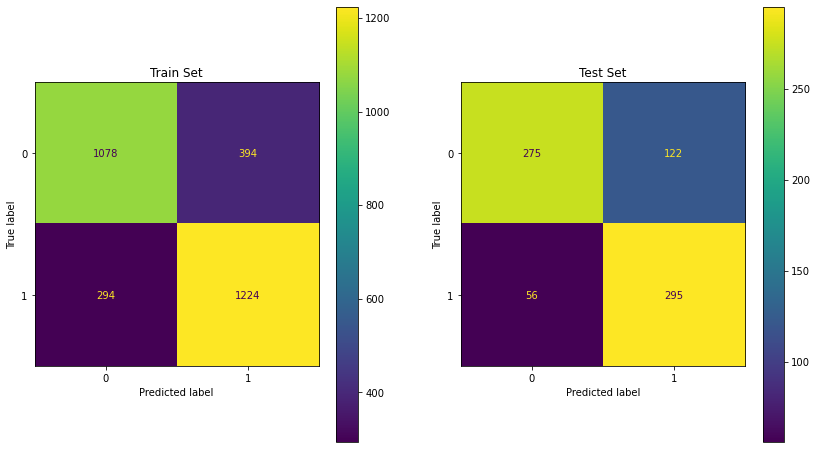

In [21]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model1= DecisionTreeClassifier(max_depth=6)
model1.fit(X_train, y_train)
print(model1.score(X_test, y_test))
print(model1.score(X_train, y_train))

y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model1,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model1,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.731773,0.764706
1,Precision,0.733073,0.723785
2,Recall,0.741765,0.806268


Confusion matrix for the train set
[[1062  410]
 [ 392 1126]]


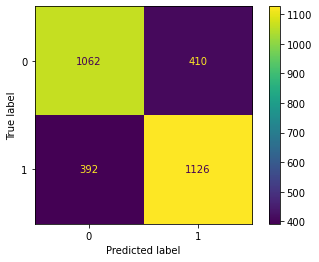



Confusion matrix for the test set
[[289 108]
 [ 68 283]]


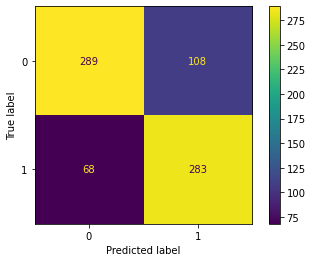

In [22]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)

model2 = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

model2.fit(X_train_mod, y_train)

y_pred_train_log = model2.predict(X_train_mod)
y_pred_test_log = model2.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(model2,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(model2,X_test_mod,y_test, values_format = 'd')
plt.show()

### KNN Classifier

In [23]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)

In [24]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [25]:
X_test_scaled=std_scaler.transform(X_test)

In [26]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.49214858  0.37734302 -0.95198525 -0.26833106]
 [-0.49214858 -1.11681541  0.41325753 -0.89885303]
 [ 2.03190673 -0.32823179 -0.47380377 -0.44926305]
 ...
 [-0.49214858 -1.07531101  0.28158436 -0.86148314]
 [-0.49214858 -0.28672739  0.22094541 -0.21449815]
 [-0.49214858 -0.7847802  -0.81338192 -0.74976488]]
--------
[[-0.49214858 -1.07531101  0.078877   -0.86924263]
 [ 2.03190673  0.62636942  1.40253878  1.18313127]
 [-0.49214858  0.25282982  1.30551645  0.69497408]
 ...
 [ 2.03190673 -0.7432758   0.58651168 -0.53691997]
 [-0.49214858 -0.7432758   0.63329031 -0.54012047]
 [ 2.03190673 -1.11681541  0.74937059 -0.89438614]]


In [27]:
model3 = KNeighborsClassifier()
model3.fit(X_train_scaled, y_train)

KNeighborsClassifier()

,Error_metric,Train,Test
0,Accuracy,0.795652,0.709893
1,Precision,0.781153,0.670051
2,Recall,0.830040,0.752137


Confusion matrix for the train set
[[1119  353]
 [ 258 1260]]


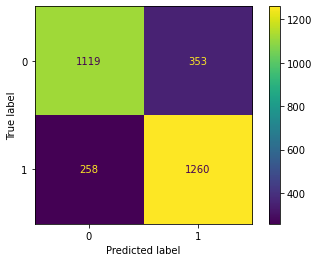



Confusion matrix for the test set
[[267 130]
 [ 87 264]]


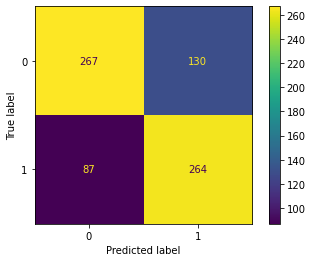

In [28]:
y_pred_train = model3.predict(X_train_scaled)
y_pred_test = model3.predict(X_test_scaled)

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance)


print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model3,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test))
plot_confusion_matrix(model3,X_test_scaled,y_test, values_format = 'd')
plt.show()

### Models Comparision

In [29]:
model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Decision Tree Classifier': 0.7207357859531773, 'Logistic Regression': 0.7297658862876254, 'KNN Classifier': 0.6906354515050167}


## Upsampling Method 

In [30]:
data = pd.concat([churnData_numerical, target], axis = 1)
churn_0 = data[data["Churn"] == 0]
churn_1 = data[data["Churn"] == 1]

In [31]:
churn_1_up = churn_1.sample(len(churn_0), replace = True)
print(churn_1_up.shape)

(5174, 5)


In [32]:
churn_1_up 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
2526,0,1,19.40,19.40,1
3049,0,3,19.75,58.85,1
901,0,9,98.30,923.50,1
5956,0,31,89.90,2806.90,1
1243,0,1,45.30,45.30,1
...,...,...,...,...,...
642,0,1,89.55,89.55,1
408,0,1,19.90,19.90,1
2274,0,23,99.85,2331.30,1
3178,0,52,84.10,4348.65,1


In [33]:
data = pd.concat([churn_0 , churn_1_up ], axis = 0)
data = data.sample(frac=1)
data['Churn'].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

### Decision Tree Classifier

(10348, 4)
(10348,)
0.7458937198067633
0.7672143029717323


,Error_metric,Train,Test
0,Accuracy,0.767214,0.745894
1,Precision,0.768503,0.750000
2,Recall,0.764976,0.736944


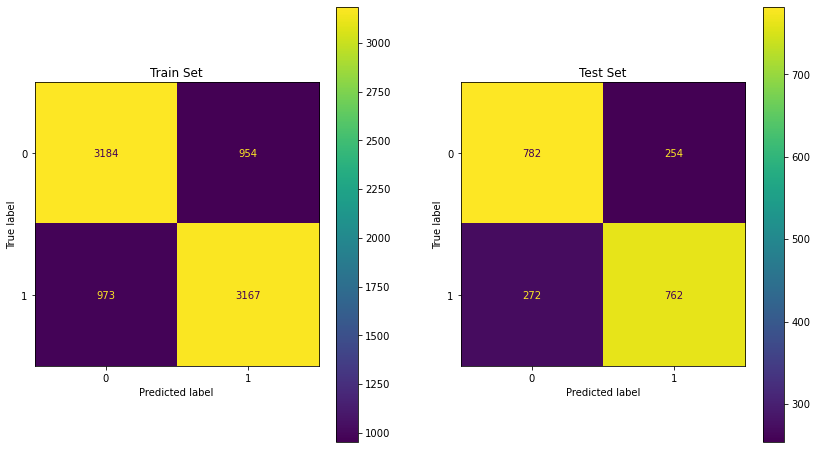

In [34]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model1= DecisionTreeClassifier(max_depth=6)
model1.fit(X_train, y_train)
print(model1.score(X_test, y_test))
print(model1.score(X_train, y_train))

y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model1,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model1,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.730853,0.727536
1,Precision,0.728708,0.726397
2,Recall,0.735749,0.729207


Confusion matrix for the train set
[[3004 1134]
 [1094 3046]]


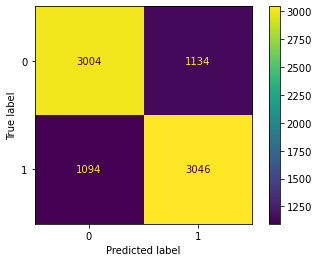



Confusion matrix for the test set
[[752 284]
 [280 754]]


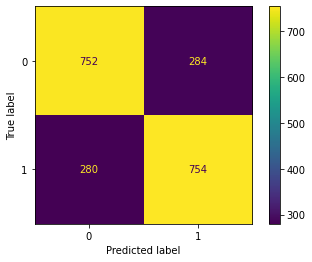

In [35]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)

model2 = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

model2.fit(X_train_mod, y_train)

y_pred_train_log = model2.predict(X_train_mod)
y_pred_test_log = model2.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(model2,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(model2,X_test_mod,y_test, values_format = 'd')
plt.show()

### KNN Classifier

In [36]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)

In [37]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [38]:
X_test_scaled=std_scaler.transform(X_test)

In [39]:
model3 = KNeighborsClassifier()
model3.fit(X_train_scaled, y_train)

KNeighborsClassifier()

,Error_metric,Train,Test
0,Accuracy,0.846944,0.769565
1,Precision,0.800964,0.738238
2,Recall,0.923430,0.834623


Confusion matrix for the train set
[[3188  950]
 [ 317 3823]]


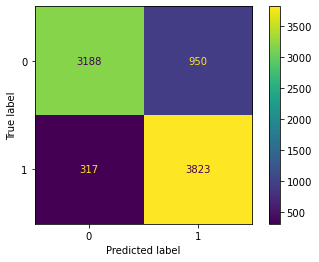



Confusion matrix for the test set
[[730 306]
 [171 863]]


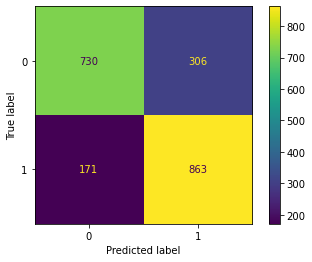

In [40]:
y_pred_train = model3.predict(X_train_scaled)
y_pred_test = model3.predict(X_test_scaled)

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance)


print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model3,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test))
plot_confusion_matrix(model3,X_test_scaled,y_test, values_format = 'd')
plt.show()

### Models Comparision

In [41]:
model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Decision Tree Classifier': 0.7478858531459346, 'Logistic Regression': 0.7394311630690193, 'KNN Classifier': 0.7477661018433381}


## Upsampling using SMOTE

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [43]:
data = pd.concat([churnData_numerical, target], axis = 1)
y = data['Churn']
X = data.drop(['Churn'], axis=1)

In [44]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [45]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

### Decision Tree Classifier

0.7468599033816425
0.769992751872433


,Error_metric,Train,Test
0,Accuracy,0.769993,0.746860
1,Precision,0.752822,0.732537
2,Recall,0.804778,0.773786


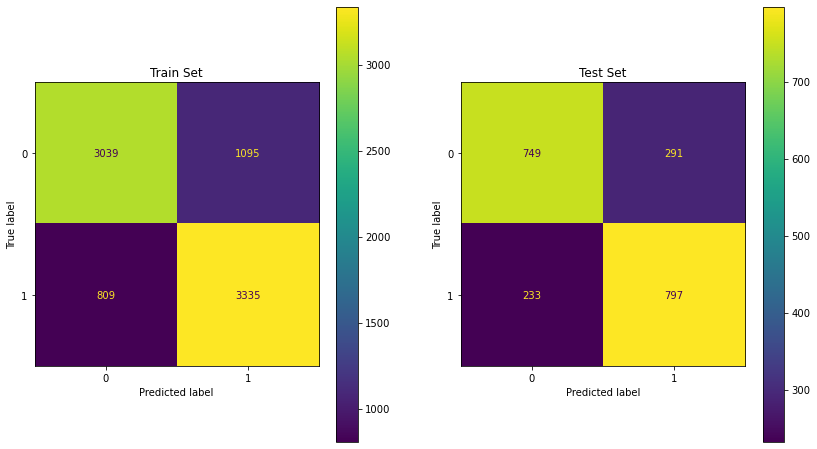

In [47]:
y = y_sm
X = X_sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model1= DecisionTreeClassifier(max_depth=6)
model1.fit(X_train, y_train)
print(model1.score(X_test, y_test))
print(model1.score(X_train, y_train))

y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model1,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model1,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.739913,0.719324
1,Precision,0.737533,0.726997
2,Recall,0.745898,0.698058


Confusion matrix for the train set
[[3034 1100]
 [1053 3091]]


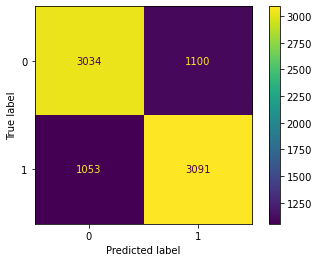



Confusion matrix for the test set
[[770 270]
 [311 719]]


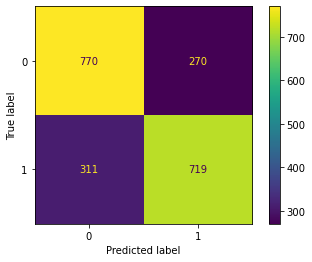

In [48]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)

model2 = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

model2.fit(X_train_mod, y_train)

y_pred_train_log = model2.predict(X_train_mod)
y_pred_test_log = model2.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(model2,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(model2,X_test_mod,y_test, values_format = 'd')
plt.show()

### KNN Classifier

In [49]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)

In [50]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [51]:
X_test_scaled=std_scaler.transform(X_test)

In [52]:
model3 = KNeighborsClassifier()
model3.fit(X_train_scaled, y_train)

KNeighborsClassifier()

,Error_metric,Train,Test
0,Accuracy,0.832206,0.747343
1,Precision,0.816158,0.735814
2,Recall,0.858108,0.767961


Confusion matrix for the train set
[[3333  801]
 [ 588 3556]]


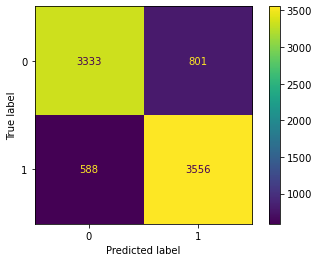



Confusion matrix for the test set
[[756 284]
 [239 791]]


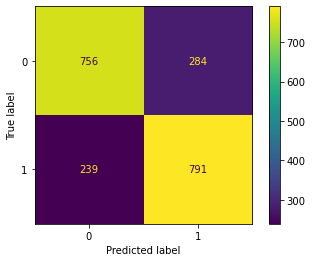

In [53]:
y_pred_train = model3.predict(X_train_scaled)
y_pred_test = model3.predict(X_test_scaled)

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance)


print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train))
plot_confusion_matrix(model3,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test))
plot_confusion_matrix(model3,X_test_scaled,y_test, values_format = 'd')
plt.show()

### Models Comparision

In [54]:
model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Decision Tree Classifier': 0.750422522877534, 'Logistic Regression': 0.7367737933651501, 'KNN Classifier': 0.7614165827458879}
